<a href="https://colab.research.google.com/github/soniya1993/online-retail-customer-segment/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


we can clearly see that their are null value present in dataset
drop null values

In [9]:
#dropping null values
df.dropna(inplace=True)


After removeing null value in our dataset .it reduces to (406829, 8)


In [10]:
#Checking invoice number
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [11]:
#only taking data with valid orders no cancellation is taken 
df=df[~df['InvoiceNo'].str.contains('C')]

In [12]:
# finding out shape after removing cancelled products
df.shape

(397924, 8)

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# Exploratory Data Analysis

In [14]:
Description_df=df.Description.value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()


,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [15]:
Description_df.tail()


,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Top 5 product

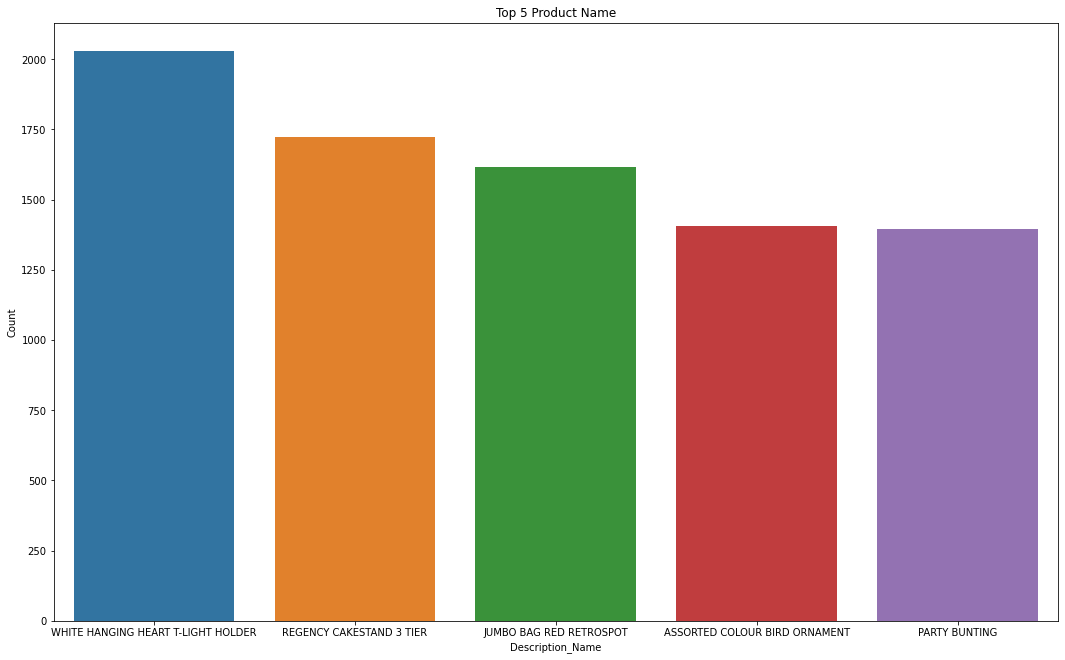

In [16]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

Bottom 5 product

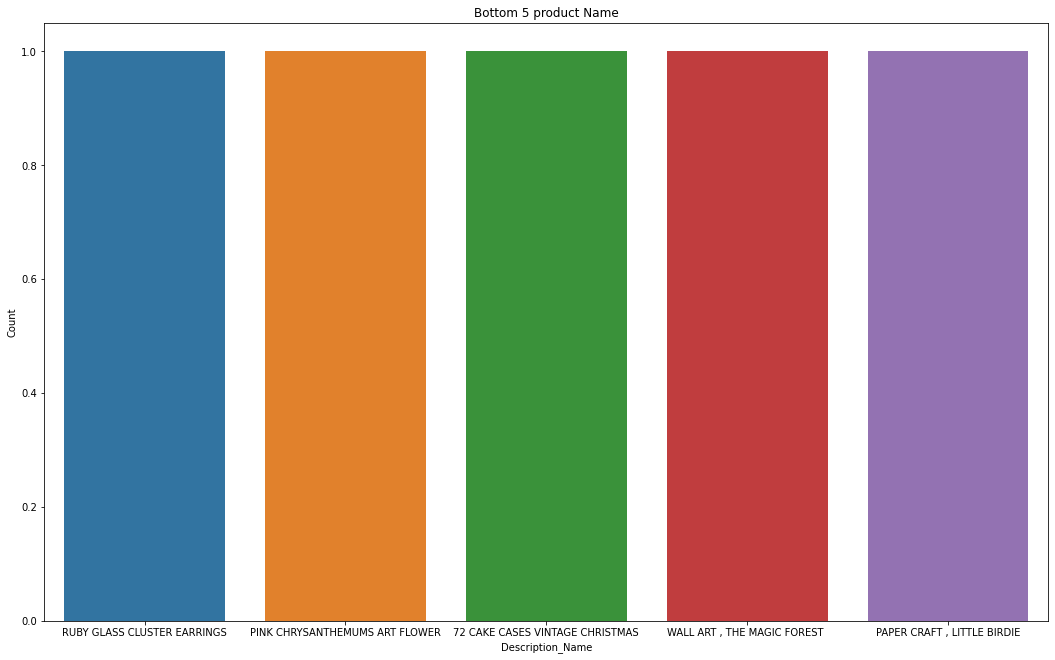

In [17]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

Top 10 countries with most number of purchase

In [18]:
country_df=df.Country.value_counts().reset_index()
country_df.rename(columns={'index': 'country name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()


,country name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


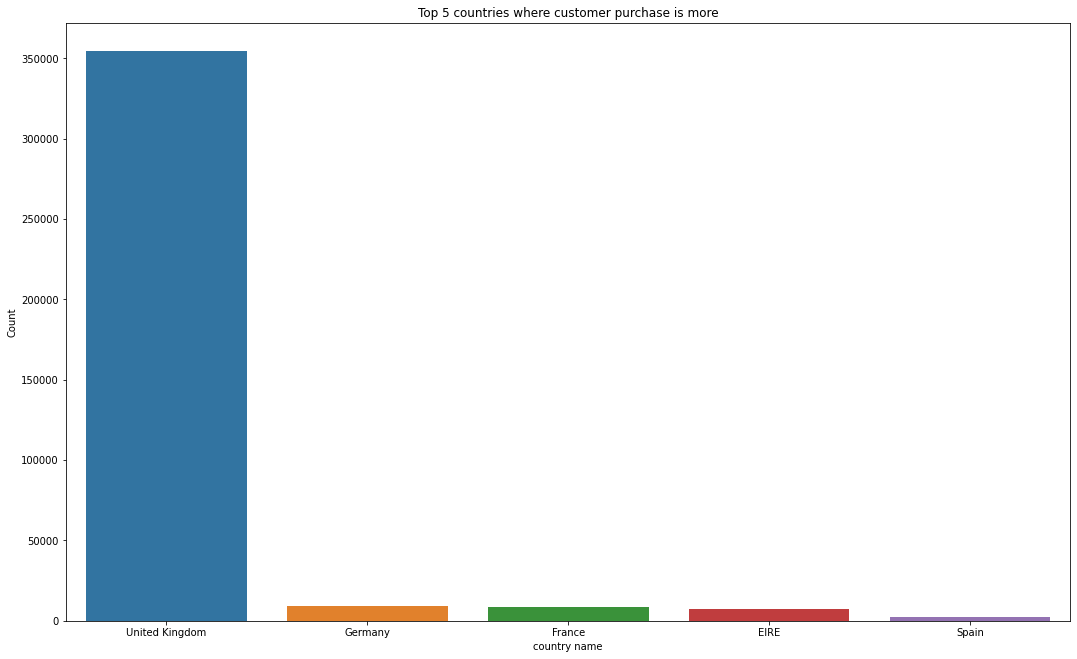

In [19]:
plt.figure(figsize=(18,11))
plt.title('Top 5 countries where customer purchase is more')
sns.barplot(x='country name',y='Count',data=country_df[:5])

In [20]:
country_df.tail()

,country name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


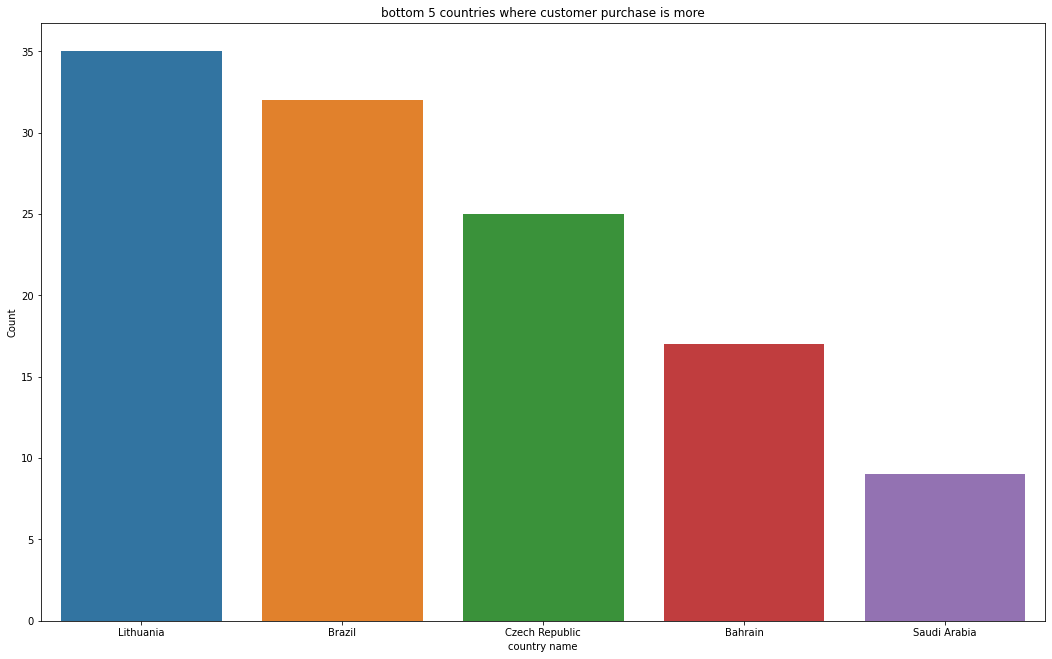

In [21]:
plt.figure(figsize=(18,11))
plt.title('bottom 5 countries where customer purchase is more')
sns.barplot(x='country name',y='Count',data=country_df[-5:])

We have two interger type feature let see the distribution of those column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


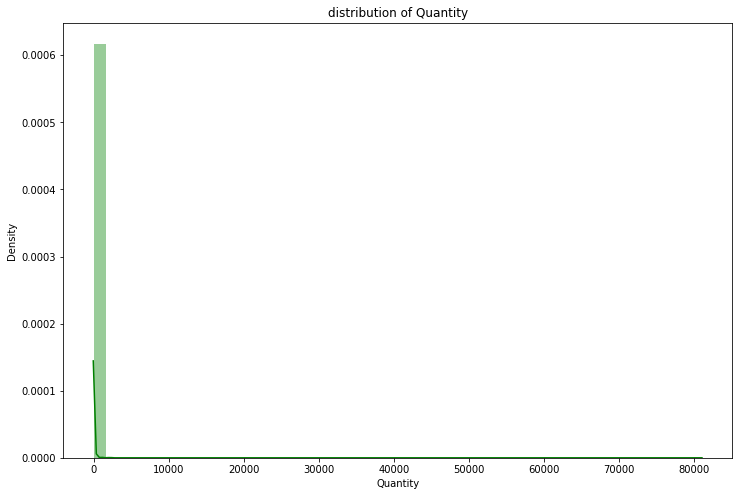

In [22]:
plt.figure(figsize=(12,8))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="g")
plt.show()

transformation of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


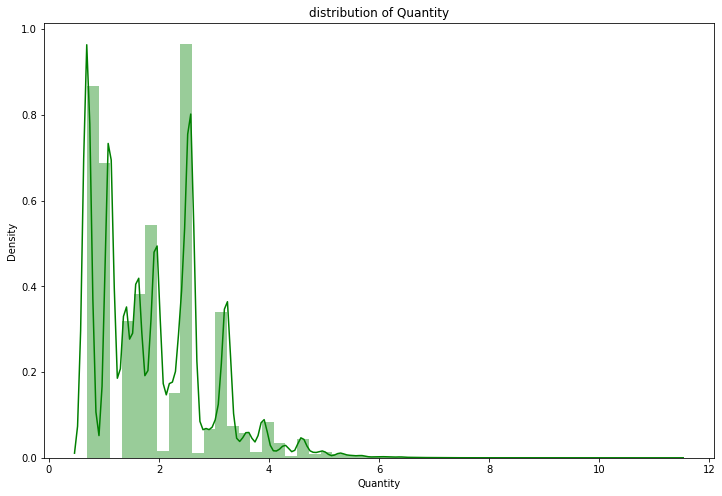

In [23]:
plt.figure(figsize=(12,8))
plt.title('distribution of Quantity')
sns.distplot(np.log1p(df['Quantity']),color="g")
plt.show()

Price column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2681: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


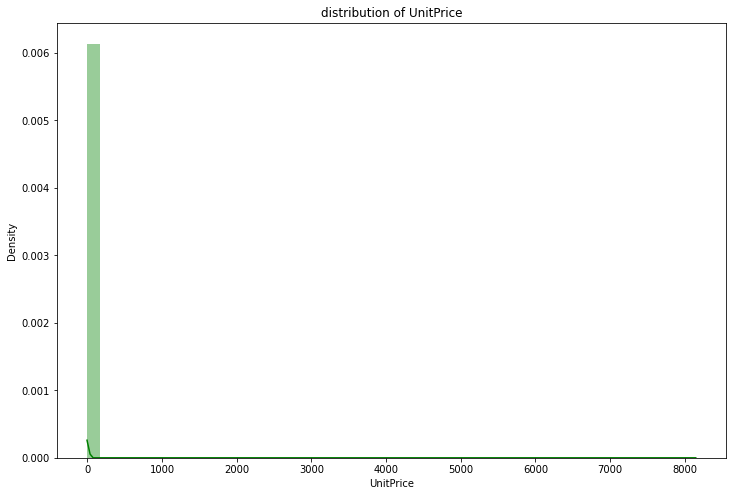

In [24]:
plt.figure(figsize=(12,8))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="G")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


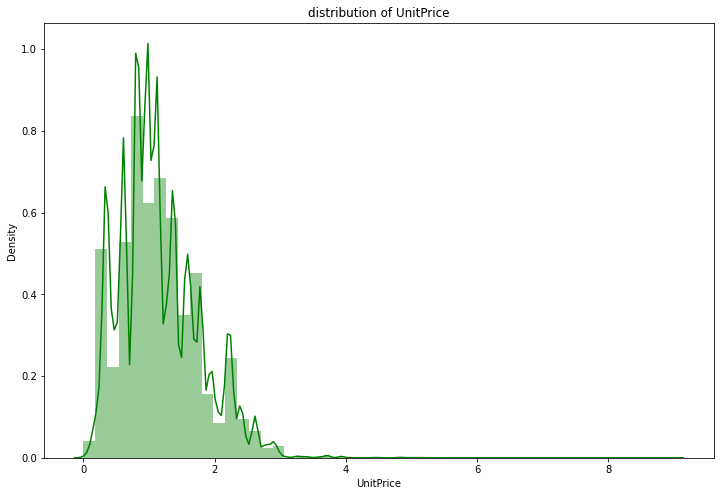

In [25]:
plt.figure(figsize=(12,8))
plt.title('distribution of UnitPrice')
sns.distplot(np.log1p(df['UnitPrice']),color="G")

Ignore all the sell's that are negative

In [26]:
df=df[df['UnitPrice']>0]

#Feature engineering

Extracting more features from date column

In [27]:
#Converting the invoicedate column into datetime format
df["day"]=df['InvoiceDate'].dt.day_name()
df["month"]=df['InvoiceDate'].dt.month_name()
df["year"]=df['InvoiceDate'].dt.year
df["hour"]=df['InvoiceDate'].dt.hour
df["minute"]=df['InvoiceDate'].dt.minute



Total amount per invoice
i.e Total bill amount
Total amount = no. of unit * price

In [28]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

Distribution of Total amount data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


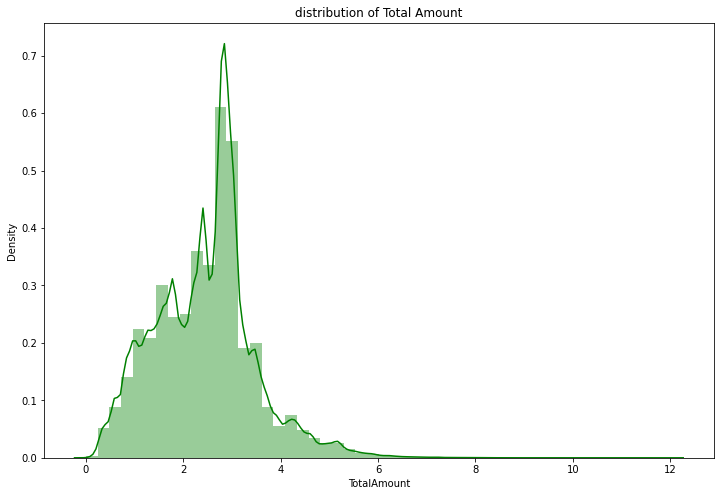

In [29]:
plt.figure(figsize=(12,8))
plt.title('distribution of Total Amount')
sns.distplot(np.log1p(df['TotalAmount']),color="G")

Exploratory data analysis (EDA)
date wise

In [30]:
day_df=df['day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


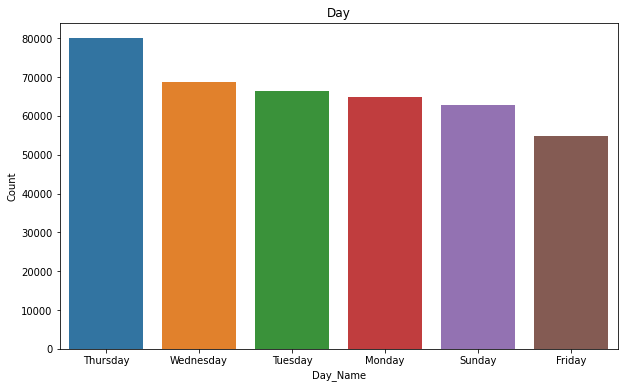

In [31]:
plt.figure(figsize=(10,6))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

Month wise analysis

In [32]:
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


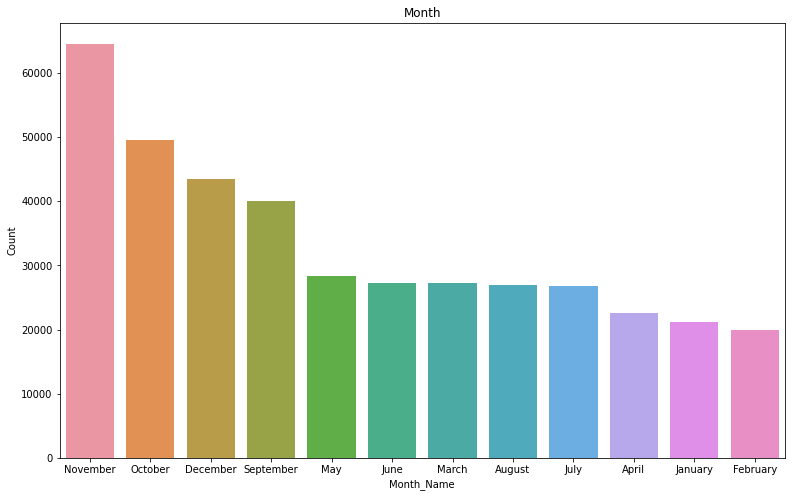

In [33]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

hour analysis

In [34]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72065
1,13,64026
2,14,54118
3,11,49084
4,15,45369
5,10,37997
6,16,24089
7,9,21944
8,17,13071
9,8,8690


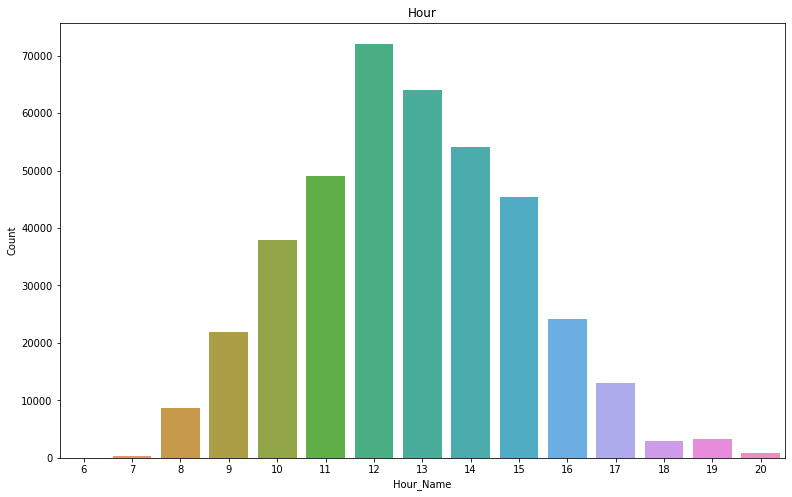

In [35]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

Conclusion:-

1)we can conclude that most of the customers have purches the items in Thursday ,Wednesday and Tuesday
2)from above we can conclude that most numbers of customers have purches the gifts in the month of November ,october and December September
3)From this graph we can see that in AfterNone Time most of the customers have purches the item.
4)Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening

#RFM model


Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:-> Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

Performing RFM Segmentation and RFM Analysis, Step by Step The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool


RFM Score

Recency = Latest Date - Last Inovice Data, 

Frequency = count of invoice no. of transaction(s), 

Monetary = Sum of Total

In [36]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                       'InvoiceNo': lambda x: len(x),
                                       'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


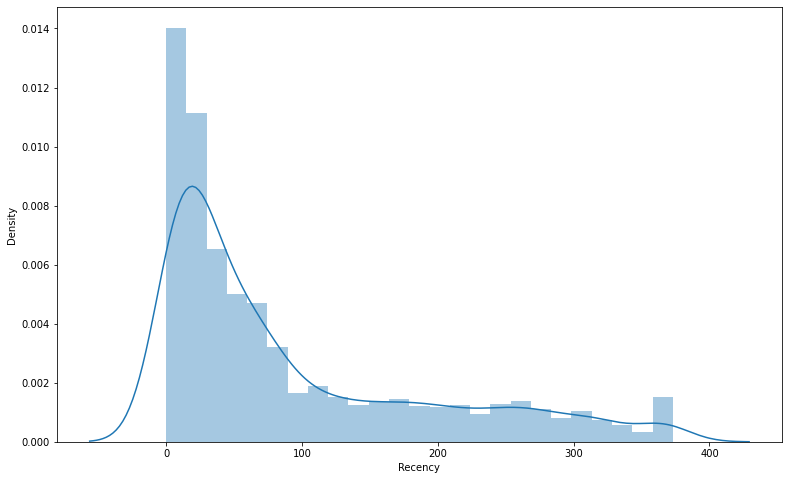

In [37]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


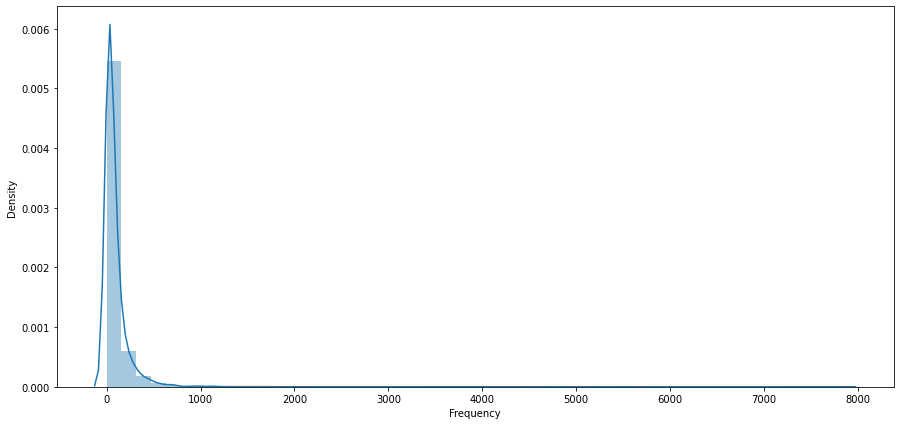

In [38]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(15,7))
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


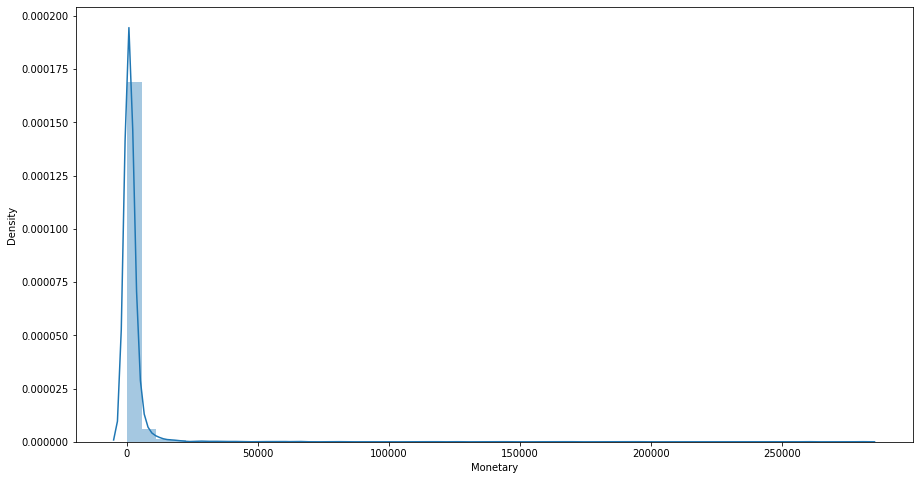

In [39]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(15,8))
sns.distplot(x)

Split into four segments using quantiles

In [40]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [41]:
qut = pd.DataFrame(quantiles)
print(qut)

      Recency  Frequency  Monetary
0.25    17.00       17.0   307.415
0.50    50.00       41.0   674.485
0.75   141.75      100.0  1661.740


In [42]:
#Functions to create R, F and M segments

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

Basically we are giving higher score to a person how have high budget, as well how buy more frequently

In [43]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [44]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [45]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


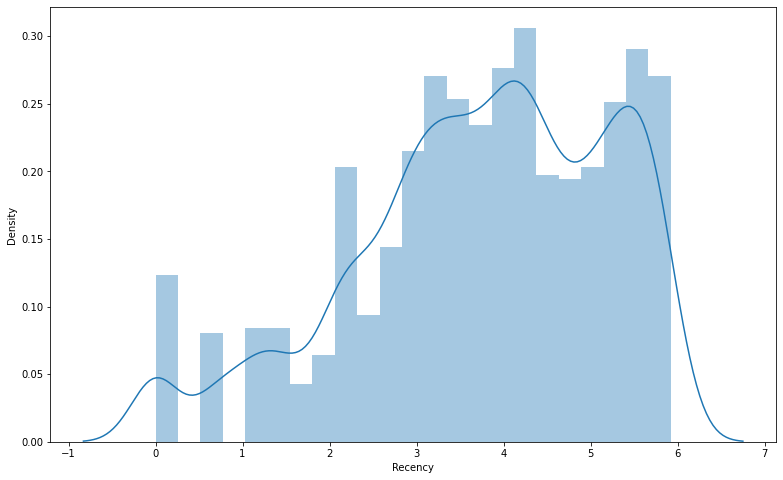

In [46]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


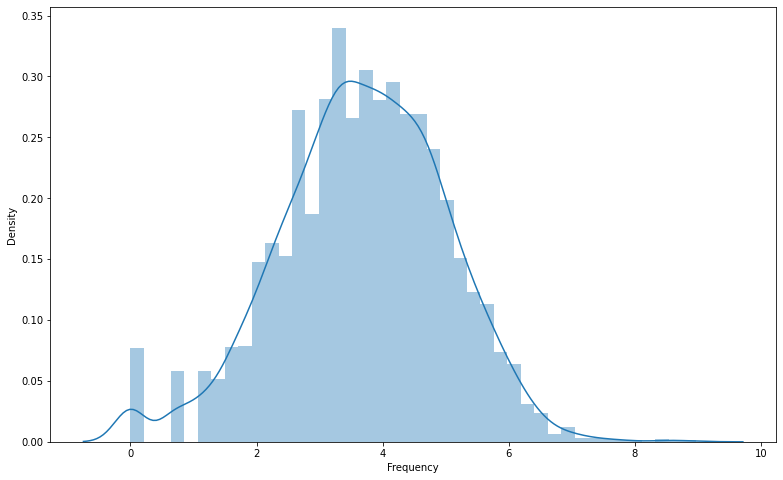

In [47]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


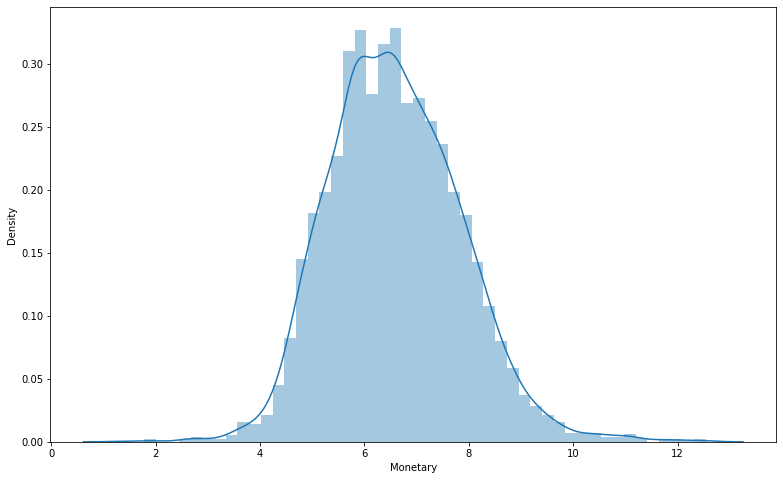

In [48]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [49]:
from numpy import math

from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#Model Implementation

K-Means Clustering

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4214972492935626
For n_clusters = 3, silhouette score is 0.3433042590141474
For n_clusters = 4, silhouette score is 0.3649058771514865
For n_clusters = 5, silhouette score is 0.33739094095185473
For n_clusters = 6, silhouette score is 0.34420701590915775
For n_clusters = 7, silhouette score is 0.34717601636387296
For n_clusters = 8, silhouette score is 0.33750009325564523
For n_clusters = 9, silhouette score is 0.3457899960085649
For n_clusters = 10, silhouette score is 0.34781154752598903
For n_clusters = 11, silhouette score is 0.3385166366909024
For n_clusters = 12, silhouette score is 0.343292238914847
For n_clusters = 13, silhouette score is 0.3397591484872725
For n_clusters = 14, silhouette score is 0.3476587085726242
For n_clusters = 15, silhouette score is 0.3405687191288392



Silhouette score

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:
Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.
The Silhouette Coefficient for a sample is S=(b−a)/max(a,b) .

Applying Elbow
Te elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

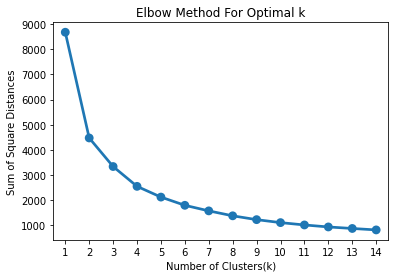

In [51]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

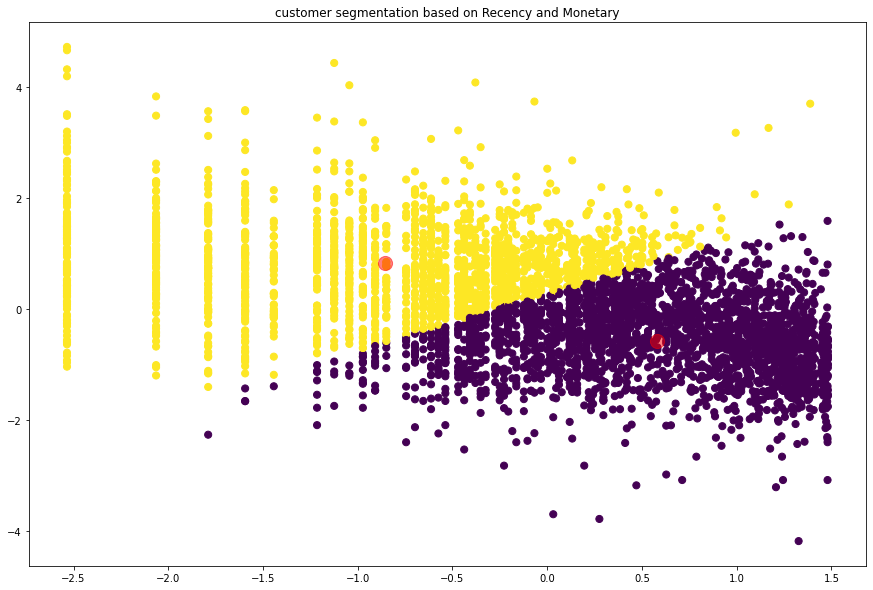

In [53]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

DBSCAN implementation

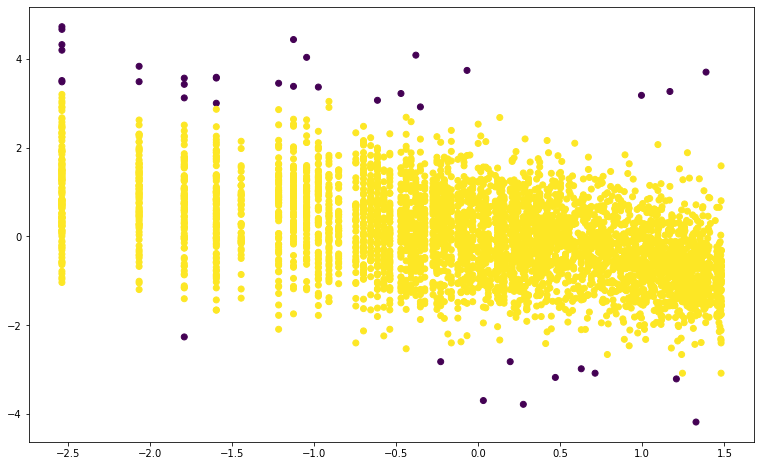

In [54]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

Customers are well separate when we cluster them by Recency and Monetary

**Silhouette Score Method on Frquency and Monetary**

In [55]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.37144143386851886
For n_clusters = 5, silhouette score is 0.34313128728830367
For n_clusters = 6, silhouette score is 0.36005136973736307
For n_clusters = 7, silhouette score is 0.3386273158196425
For n_clusters = 8, silhouette score is 0.3188273013604127
For n_clusters = 9, silhouette score is 0.3461504728548979
For n_clusters = 10, silhouette score is 0.35916837883766783
For n_clusters = 11, silhouette score is 0.3680807674722023
For n_clusters = 12, silhouette score is 0.352280078384588
For n_clusters = 13, silhouette score is 0.36277521186689304
For n_clusters = 14, silhouette score is 0.3665649585132594
For n_clusters = 15, silhouette score is 0.3447941126369905



**Elbow Method on frequency and monetary**


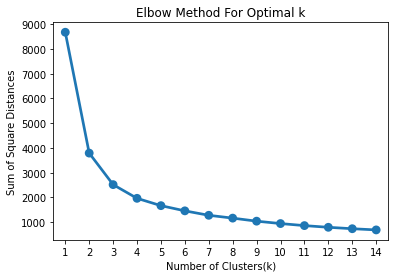

In [56]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

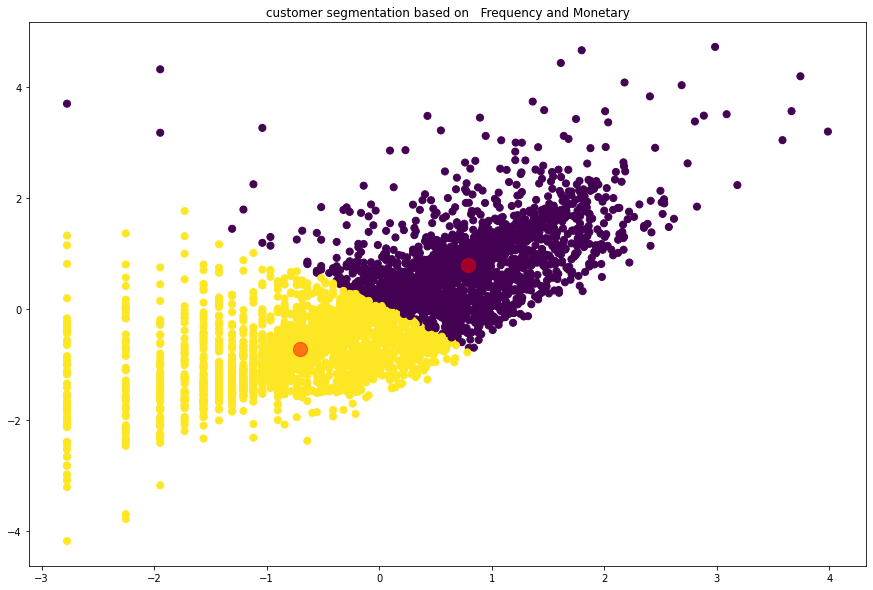

In [58]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**Customers are well separate when we cluster them by Frequency and Monetary**

**DBSCAN to Method on Frquency and Monetary**

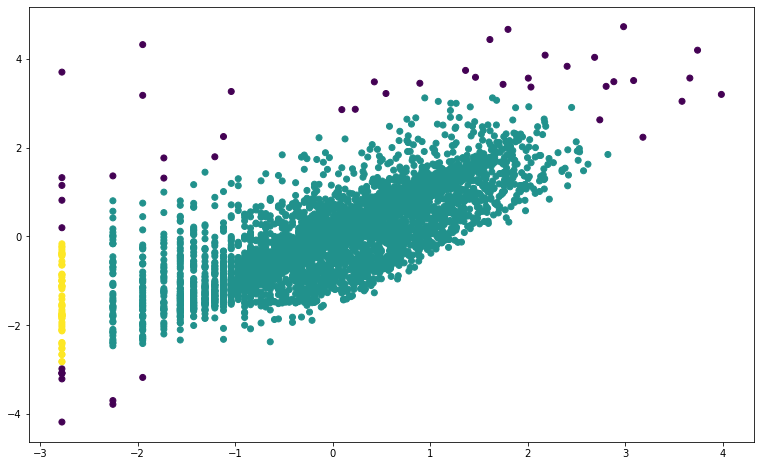

In [59]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

we see that ,Customers are well separate when we cluster them by Frequency and Monetary

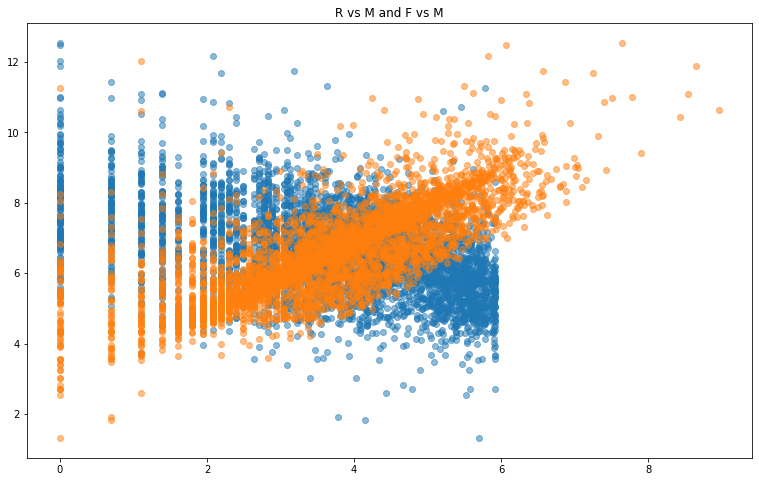

In [60]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

#Silhouette Method on Recency ,Frequency and Monetary

In [61]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.3956478042246982
For n_clusters = 4 The average silhouette_score is : 0.30279724233096916
For n_clusters = 5 The average silhouette_score is : 0.2785519277480847
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828


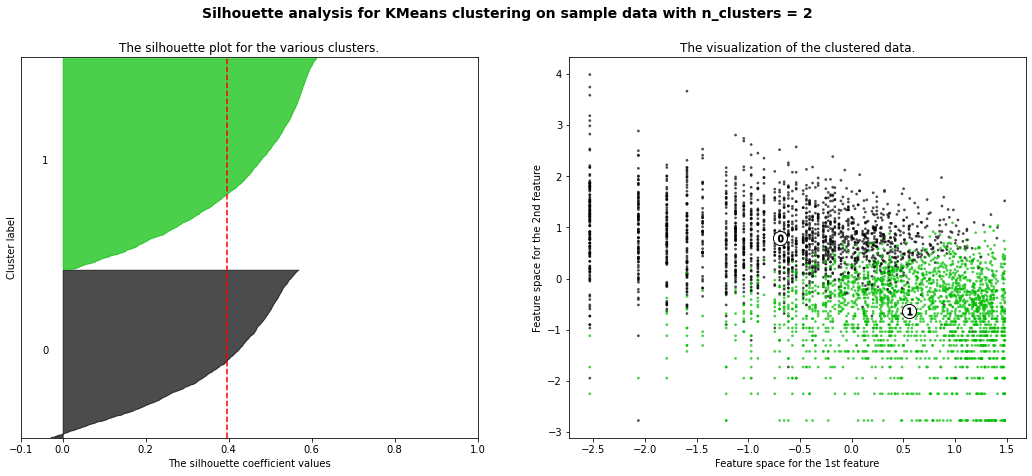

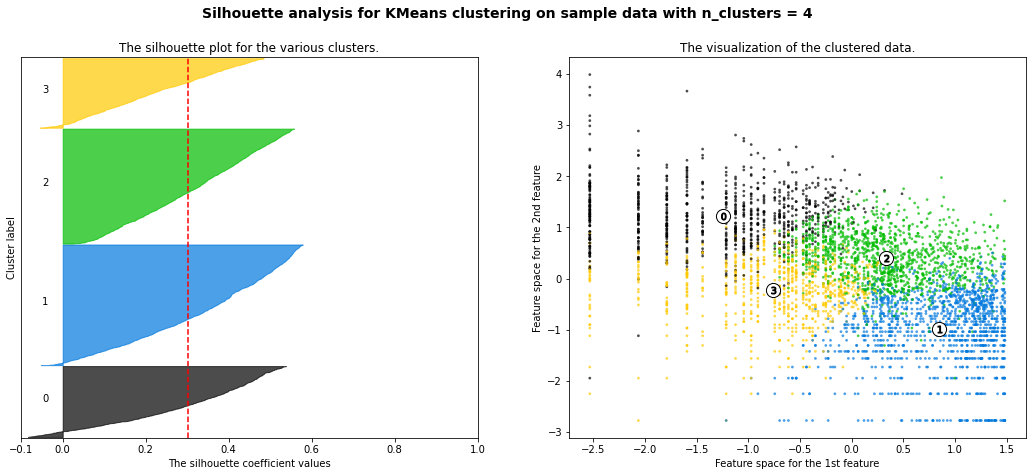

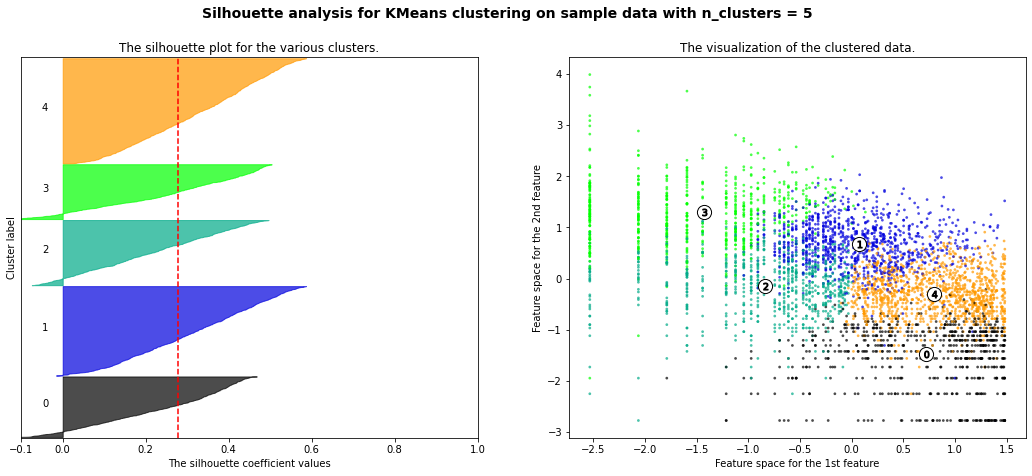

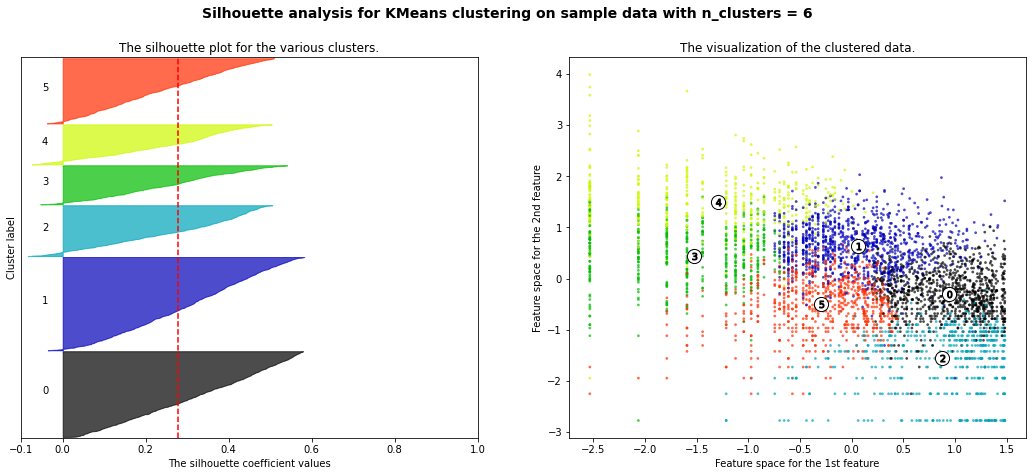

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

we can clearly see that if we apply 2 cluster on RFM column they are clearly seprable